# **LIMPIEZA 3**

"Sin información": empresa, status_cuenta, razones_buro, codigo_postal.

Mediana: puntos, semana_actual

Fecha "00/00/0000": fecha_ultimo_pago, fecha_pago_proximo

Media: porc_enganche, porc_tasa, riesgo

Eliminar_columnas: AH

In [22]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Carga y visualización de archivos
cuentas = pd.read_excel("Credicel_Limpio_Celdas.xlsx")

#Para poder ver bases completas cuando necesitamos info
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [24]:
cuentas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [25]:
len(cuentas)

22735

In [26]:
cuentas.head(10)

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,agente_venta,dis_venta,status,fraude,empresa,inversion,pagos_realizados,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,AH
0,3,HDNAWQ3A,30,2021-11-12 19:00:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81,1169.0,2106,0.0,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,0,NaT,NaT,NaN,0.0,0,0.0,0.0,0,NaN,NaN,26,NaN
1,4,M418YNR4,33,2021-11-12 19:15:00,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225,1949.0,2925,0.0,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,0,NaT,NaT,NaN,0.0,0,0.0,0.0,0,NaN,NaN,13,NaN
2,5,SZ7V3NZT,37,2021-11-13 14:13:00,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,0,NaT,NaT,Cancelado,0.0,0,0.0,0.0,0,NaN,NaN,74,NaN
3,6,9I08UIQZ,38,2021-11-13 15:45:00,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,0,NaT,NaT,NaN,0.0,0,0.0,0.0,0,NaN,NaN,13,NaN
4,7,JMF4LKYU,44,2021-11-13 16:10:00,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178,3224.0,6942,0.0,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,0,2022-03-05,2022-03-12,Mora,0.0,0,0.0,0.0,0,NaN,NaN,74,NaN
5,8,FOBQ8A27,49,2021-11-13 16:50:00,MOTOROLA,LTE XT2097-12 E7I POWER Azul,26S,2999.0,750.0,0.0,156,2249.0,4056,0.0,Karim Hassan Mendez Animas GP,mic0569,2,0,microtec,0,0,0,NaT,NaT,NaN,0.0,0,0.0,0.0,0,NaN,NaN,26,NaN
6,9,UND81DCF,50,2021-11-13 17:19:00,MOTOROLA,E7I POWER 2+32 GB AZUL B,26S,2999.0,900.0,0.0,145,2099.0,3770,0.0,Luis Gerardo Almanzar Hernandez,mic0437,2,0,microtec,0,0,0,NaT,NaT,NaN,0.0,0,0.0,0.0,0,NaN,NaN,26,NaN
7,10,LMC1PBLV,54,2021-11-14 11:19:00,MOTOROLA,LTE XT2128-1 G20 Rosa,13S,3999.0,1500.0,0.0,288,2499.0,3744,0.0,Mayra Jazmin Reyes Patino,mic0666,2,0,microtec,0,0,0,NaT,NaT,NaN,0.0,0,0.0,0.0,0,NaN,NaN,13,NaN
8,11,5SDZN7O1,59,2021-11-14 13:34:00,KODAK,LTE SEREN D60LX Azul,26S,2889.0,1000.0,0.0,131,1889.0,3406,0.0,Luis Gerardo Almanzar Hernandez,mic0437,2,0,microtec,0,0,0,NaT,NaT,NaN,0.0,0,0.0,0.0,0,NaN,NaN,26,NaN
9,12,R523EMQT,62,2021-11-14 14:54:00,NOKIA,NOKIA 2.4 3+64 GB GRIS B,26S,2999.0,750.0,0.0,156,2249.0,4056,0.0,Rita Dalia Morales Flores,mic08q,1,0,microtec,0,15,0,2022-09-03,2022-12-06,Mora,0.0,0,0.0,0.0,0,NaN,NaN,74,NaN


## **Valores nulos**

In [27]:
cuentas.isnull().sum().sum()

48120

In [28]:
cuentas.isnull().sum()

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                  13
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago      3356
fecha_pago_proximo     3356
status_cuenta          3315
puntos                  235
riesgo                    0
porc_enganche             0
porc_tasa                 0
score_buro                0
razones_buro           7340
semana_actual          7745
codigo_postal            27
AH                    22733
dtype: int64

In [29]:
cuentas1 = cuentas.copy()

**String *Sin información***

In [30]:
#Sin información
columnas_string_rellenar = ["empresa", "status_cuenta", "razones_buro", "codigo_postal"]
cuentas1[columnas_string_rellenar] = cuentas1[columnas_string_rellenar].fillna("Sin Información")

In [31]:
cuentas1.isnull().sum()

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                   0
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago      3356
fecha_pago_proximo     3356
status_cuenta             0
puntos                  235
riesgo                    0
porc_enganche             0
porc_tasa                 0
score_buro                0
razones_buro              0
semana_actual          7745
codigo_postal             0
AH                    22733
dtype: int64

**Strings "00/00/0000"**

In [32]:
columnas_rellenar_fecha = ["fecha_ultimo_pago", "fecha_pago_proximo"]
cuentas1[columnas_rellenar_fecha] = cuentas1[columnas_rellenar_fecha].fillna("00/00/0000")

In [33]:
cuentas1.isnull().sum()

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                   0
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago         0
fecha_pago_proximo        0
status_cuenta             0
puntos                  235
riesgo                    0
porc_enganche             0
porc_tasa                 0
score_buro                0
razones_buro              0
semana_actual          7745
codigo_postal             0
AH                    22733
dtype: int64

**Numéricos con mediana**

In [40]:
cuentas1["puntos"] = cuentas1["puntos"].fillna(cuentas["puntos"].median())
cuentas1["semana_actual"] = cuentas1["semana_actual"].fillna(cuentas["semana_actual"].median())

**Numéricos con media**

In [35]:
cuentas1["porc_enganche"] = cuentas1["porc_enganche"].fillna(cuentas["porc_enganche"].mean())
cuentas1["porc_tasa"] = cuentas1["porc_tasa"].fillna(cuentas["porc_tasa"].mean())

In [36]:
cuentas1.isnull().sum()

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                   0
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago         0
fecha_pago_proximo        0
status_cuenta             0
puntos                    0
riesgo                    0
porc_enganche             0
porc_tasa                 0
score_buro                0
razones_buro              0
semana_actual          7745
codigo_postal             0
AH                    22733
dtype: int64

**Eliminación de columnas**

In [38]:
cuentas1 = cuentas1.drop(["AH"], axis=1)


In [41]:
#Verificamos nulos
cuentas1.isnull().sum()

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
razones_buro          0
semana_actual         0
codigo_postal         0
dtype: int64

In [42]:
#Verficación de nulos completos
cuentas1.isnull().sum().sum()

0

In [45]:
cuentas1.head(10)

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,agente_venta,dis_venta,status,fraude,empresa,inversion,pagos_realizados,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal
0,3,HDNAWQ3A,30,2021-11-12 19:00:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81,1169.0,2106,0.0,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,0,00/00/0000,00/00/0000,Sin Información,0.0,0,0.0,0.0,0,Sin Información,13.0,26
1,4,M418YNR4,33,2021-11-12 19:15:00,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225,1949.0,2925,0.0,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,0,00/00/0000,00/00/0000,Sin Información,0.0,0,0.0,0.0,0,Sin Información,13.0,13
2,5,SZ7V3NZT,37,2021-11-13 14:13:00,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,0,00/00/0000,00/00/0000,Cancelado,0.0,0,0.0,0.0,0,Sin Información,13.0,74
3,6,9I08UIQZ,38,2021-11-13 15:45:00,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,0,00/00/0000,00/00/0000,Sin Información,0.0,0,0.0,0.0,0,Sin Información,13.0,13
4,7,JMF4LKYU,44,2021-11-13 16:10:00,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178,3224.0,6942,0.0,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,0,2022-03-05 00:00:00,2022-03-12 00:00:00,Mora,0.0,0,0.0,0.0,0,Sin Información,13.0,74
5,8,FOBQ8A27,49,2021-11-13 16:50:00,MOTOROLA,LTE XT2097-12 E7I POWER Azul,26S,2999.0,750.0,0.0,156,2249.0,4056,0.0,Karim Hassan Mendez Animas GP,mic0569,2,0,microtec,0,0,0,00/00/0000,00/00/0000,Sin Información,0.0,0,0.0,0.0,0,Sin Información,13.0,26
6,9,UND81DCF,50,2021-11-13 17:19:00,MOTOROLA,E7I POWER 2+32 GB AZUL B,26S,2999.0,900.0,0.0,145,2099.0,3770,0.0,Luis Gerardo Almanzar Hernandez,mic0437,2,0,microtec,0,0,0,00/00/0000,00/00/0000,Sin Información,0.0,0,0.0,0.0,0,Sin Información,13.0,26
7,10,LMC1PBLV,54,2021-11-14 11:19:00,MOTOROLA,LTE XT2128-1 G20 Rosa,13S,3999.0,1500.0,0.0,288,2499.0,3744,0.0,Mayra Jazmin Reyes Patino,mic0666,2,0,microtec,0,0,0,00/00/0000,00/00/0000,Sin Información,0.0,0,0.0,0.0,0,Sin Información,13.0,13
8,11,5SDZN7O1,59,2021-11-14 13:34:00,KODAK,LTE SEREN D60LX Azul,26S,2889.0,1000.0,0.0,131,1889.0,3406,0.0,Luis Gerardo Almanzar Hernandez,mic0437,2,0,microtec,0,0,0,00/00/0000,00/00/0000,Sin Información,0.0,0,0.0,0.0,0,Sin Información,13.0,26
9,12,R523EMQT,62,2021-11-14 14:54:00,NOKIA,NOKIA 2.4 3+64 GB GRIS B,26S,2999.0,750.0,0.0,156,2249.0,4056,0.0,Rita Dalia Morales Flores,mic08q,1,0,microtec,0,15,0,2022-09-03 00:00:00,2022-12-06 00:00:00,Mora,0.0,0,0.0,0.0,0,Sin Información,13.0,74


## **Outliers**

<Figure size 1500x800 with 0 Axes>

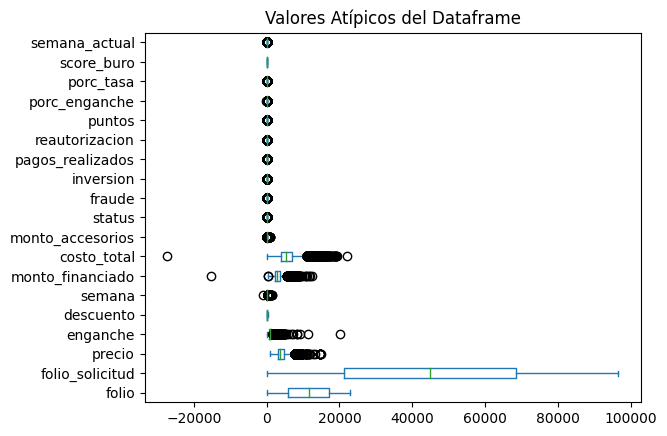

In [46]:
fig = plt.figure(figsize =(15, 8))
cuentas1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [47]:
#Separamos columnas
columnas1 = cuentas1.iloc[ : , 7:14]
columnas2 = cuentas1.iloc[ : , [16,17]]
columnas3 = cuentas1.iloc[ : , [19, 20, 21]]
columnas4 = cuentas1.iloc[ : , [25]]
columnas5 = cuentas1.iloc[ : , [27, 28, 29]]

cuentas_cuanti = pd.concat([columnas1, columnas2, columnas3, columnas4, columnas5], axis = 1)
cuentas_cuanti.head()

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,0,0,0,0,0.0,0.0,0.0,0
1,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,0,0,0,0,0.0,0.0,0.0,0
2,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,0,0,0,0,0.0,0.0,0.0,0
3,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,0,0,0,0,0.0,0.0,0.0,0
4,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,0,0,0,0,0.0,0.0,0.0,0


In [48]:
#Tratamiento con desviación estándar
    #Marcamos límites
y = cuentas_cuanti
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido precio               6720.050919
enganche             1879.810360
descuento             344.968594
semana                440.107378
monto_financiado     5269.590744
costo_total         10471.622939
monto_accesorios      131.995176
status                  2.159244
fraude                  0.601027
inversion               1.086598
pagos_realizados       29.597681
reautorizacion          0.396739
puntos                 36.957218
porc_enganche           7.424866
porc_tasa               1.041540
score_buro              0.000000
dtype: float64
Limite inferior permitido precio              1274.022264
enganche             -26.935581
descuento           -188.017109
semana                35.387322
monto_financiado     882.682482
costo_total          927.761710
monto_accesorios    -105.067640
status                 0.351510
fraude                -0.451390
inversion             -0.613407
pagos_realizados      -9.236124
reautorizacion        -0.328650
puntos               

In [49]:
#Hacemos el cambio a un nuevo data frame
cuanti_cuentas_limpio_out = cuentas_cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]
cuanti_cuentas_limpio_out.head()

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [50]:
#Observamos valores atípicos del data frame
outliers_cuan_cuentas= cuentas_cuanti[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_cuan_cuentas.head()

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Cambiamos nuevo nulos a media
cuanti_cuentas_limpio_out_mean = cuanti_cuentas_limpio_out.copy()
cuanti_cuentas_limpio_out_mean = cuanti_cuentas_limpio_out.fillna(cuanti_cuentas_limpio_out.mean())
cuanti_cuentas_limpio_out_mean.head()

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro
0,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.243346,0.0,0,0.0,0.0,0.0,0.0,0.0,0
3,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0
4,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [52]:
#Para crear el dataframe de cualitativas, solo se "restan" aquellas variables que ya ocupamos del dataframe de cuantitatuvas
columnas_a_eliminar = cuentas_cuanti.columns
cuentas_cuali = cuentas1.drop(columns=columnas_a_eliminar)
cuentas_cuali.columns

Index(['folio', 'tag', 'folio_solicitud', 'fecha', 'marca', 'modelo', 'plazo',
       'agente_venta', 'dis_venta', 'empresa', 'fecha_ultimo_pago',
       'fecha_pago_proximo', 'status_cuenta', 'riesgo', 'razones_buro',
       'semana_actual', 'codigo_postal'],
      dtype='object')

<Figure size 1500x800 with 0 Axes>

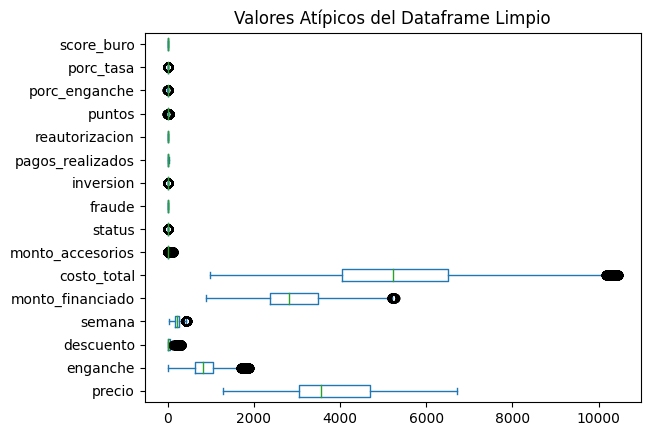

In [53]:
#Volvemos a observar en diagrama de cajas
fig = plt.figure(figsize =(15, 8))
cuanti_cuentas_limpio_out_mean.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Limpio")
plt.show()

**Juntamos y guardamos nueva base 1**

In [54]:
cuentas_final1 = pd.concat([cuanti_cuentas_limpio_out_mean, cuentas_cuali])
cuentas_final1.to_csv("Credicel_Limpio3.csv")